In [1]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

2024-06-06 03:10:17.456893: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 03:10:17.456996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 03:10:17.641577: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/cassava-leaf-disease-classification/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 17117 files belonging to 5 classes.


In [3]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/cassava-leaf-disease-classification/test',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 4280 files belonging to 5 classes.


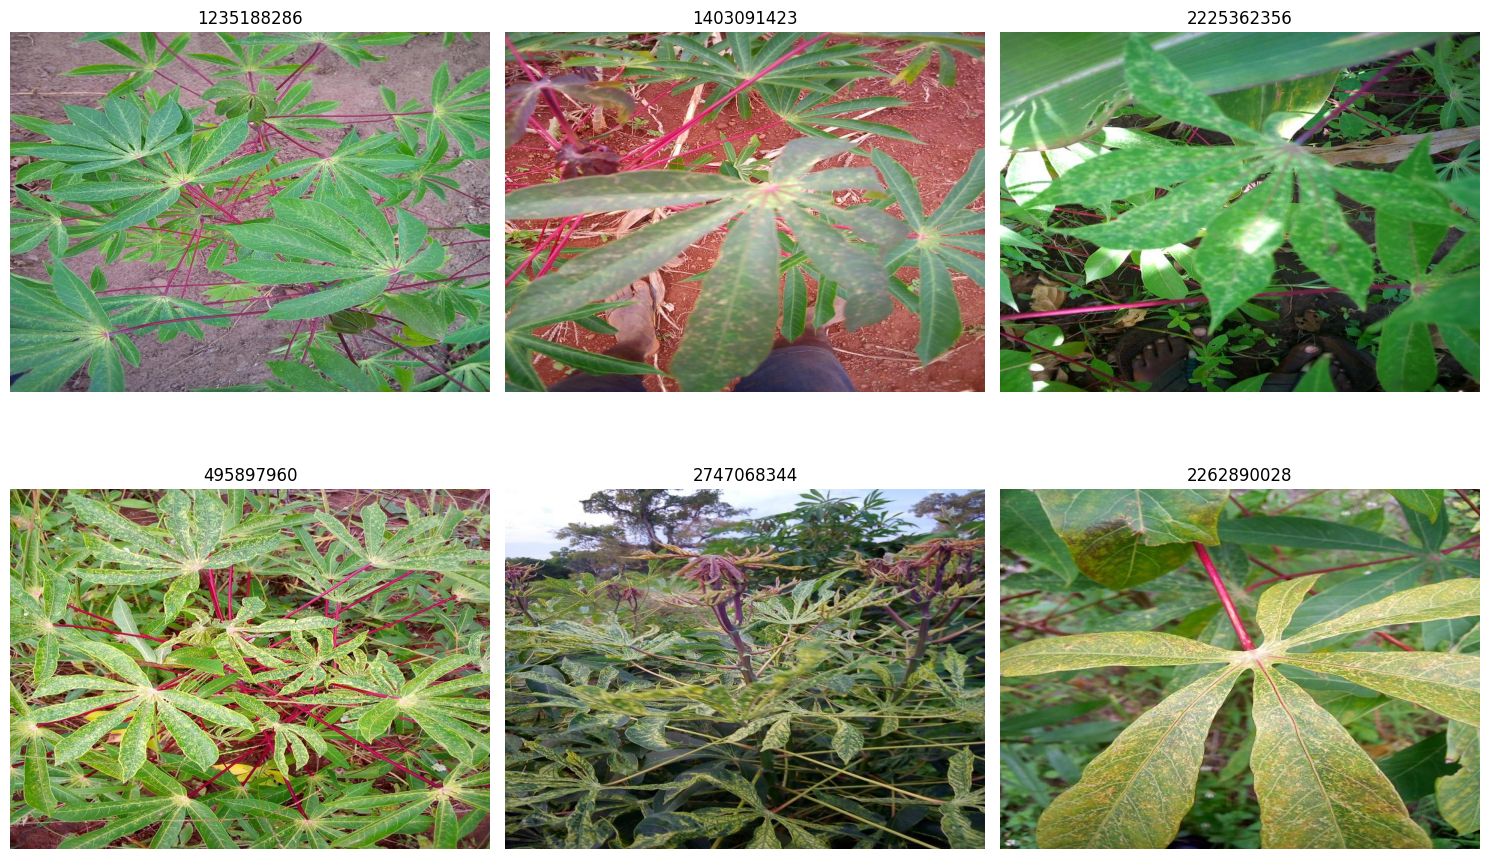

In [4]:
# Path to the directory containing images
path = "/kaggle/input/cassava-leaf-disease-classification/train/Cassava Green Mottle (CGM)"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

In [5]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
conv_base.trainable = False

In [7]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [8]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [9]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(train_data, epochs=100, validation_data=val_data, callbacks=[EarlyStopping(patience=5)])

Epoch 1/100
  1/535 ━━━━━━━━━━━━━━━━━━━━ 7:02:16 47s/step - accuracy: 0.2188 - loss: 2.1286

I0000 00:00:1717643685.262423     115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717643685.340140     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


535/535 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.5657 - loss: 1.1679

W0000 00:00:1717643776.834237     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


535/535 ━━━━━━━━━━━━━━━━━━━━ 173s 235ms/step - accuracy: 0.5658 - loss: 1.1676 - val_accuracy: 0.7084 - val_loss: 0.7877
Epoch 2/100


W0000 00:00:1717643810.912507     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


535/535 ━━━━━━━━━━━━━━━━━━━━ 60s 111ms/step - accuracy: 0.7040 - loss: 0.7993 - val_accuracy: 0.7325 - val_loss: 0.7255
Epoch 3/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 60s 111ms/step - accuracy: 0.7343 - loss: 0.7249 - val_accuracy: 0.7460 - val_loss: 0.6955
Epoch 4/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 59s 111ms/step - accuracy: 0.7481 - loss: 0.6781 - val_accuracy: 0.7519 - val_loss: 0.6844
Epoch 5/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 60s 111ms/step - accuracy: 0.7546 - loss: 0.6549 - val_accuracy: 0.7561 - val_loss: 0.6732
Epoch 6/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 68s 128ms/step - accuracy: 0.7654 - loss: 0.6288 - val_accuracy: 0.7584 - val_loss: 0.6626
Epoch 7/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 60s 112ms/step - accuracy: 0.7753 - loss: 0.6051 - val_accuracy: 0.7657 - val_loss: 0.6539
Epoch 8/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 60s 113ms/step - accuracy: 0.7767 - loss: 0.5942 - val_accuracy: 0.7636 - val_loss: 0.6581
Epoch 9/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 60s 111ms/step - accuracy: 0.7905 - loss: 0.573

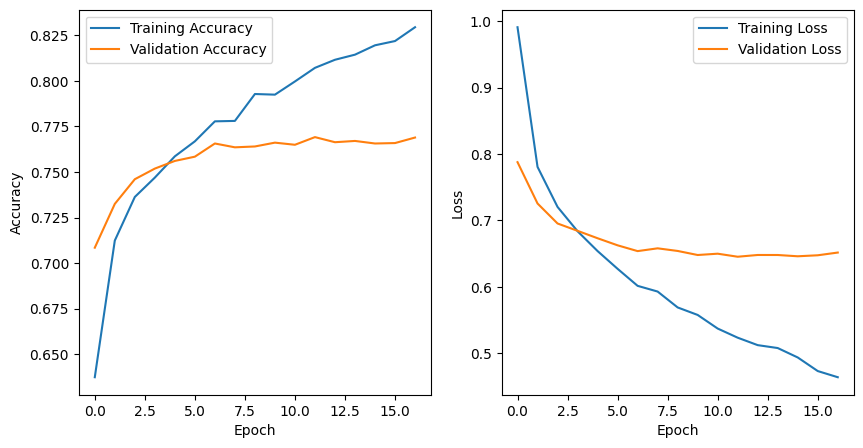

In [10]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

134/134 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.7699 - loss: 0.6518
Validation Loss: 0.651713490486145
Validation Accuracy: 0.7689252495765686


In [12]:
import numpy as np
from keras.preprocessing import image

# Path ke gambar yang ingin diprediksi
image_path = '/kaggle/input/singkong-klasifikasi/Penyakit Singkong.jpeg'  

# Fungsi untuk memuat dan memproses gambar
def load_and_process_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256))  # Memuat gambar dan mengubah ukuran ke (256, 256)
    img_array = image.img_to_array(img)  # Mengonversi gambar ke array numpy
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi tambahan sebagai batch
    img_array /= 255.0  # Normalisasi gambar
    return img_array

# Melakukan prediksi
processed_image = load_and_process_image(image_path)
predictions = model.predict(processed_image)

# Dictionary untuk mapping antara indeks kelas dan nama kelas
class_names = {
    0: "Cassava Bacterial Blight (CBB)",
    1: "Cassava Brown Streak Disease (CBSD)",
    2: "Cassava Green Mottle (CGM)",
    3: "Cassava Mosaic Disease (CMD)",
    4: "Healthy,",
#     5: "Tomato___Spider_mites Two-spotted_spider_mite",
#     6: "Tomato___Target_Spot",
#     7: "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
#     8: "Tomato___Tomato_mosaic_virus",
#     9: "Tomato___healthy",
    # Tambahkan kelas lainnya sesuai dengan jumlah kelas Anda
}

# Mengambil label kelas dengan nilai probabilitas tertinggi
predicted_class = np.argmax(predictions)

# Mengambil nama kelas berdasarkan indeks yang diprediksi
predicted_class_name = class_names[predicted_class]

# Menampilkan hasil prediksi
print("Prediksi kelas:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
Prediksi kelas: Cassava Mosaic Disease (CMD)


In [13]:
model.save("singconk.h5")